In [84]:
import pandas as pd

In [85]:
df = pd.read_csv('./data/data_nike_vs_addidas_unsupervised.csv')
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4


In [86]:
nike = df[df['Brand'] == 'Nike']

In [87]:
adidas = df[df['Brand'].str.contains('Adidas')]
adidas

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
2620,Men's adidas Adipower Vector 20 Shoes,EF3503,10999,10999,0,Adidas SPORT PERFORMANCE,4.9,47
2621,Men's adidas Cricket Howzat Shoes,EF3505,6999,6999,0,Adidas SPORT PERFORMANCE,4.4,30
2622,Men's Cricket Cri Hase Shoes,CM6008,3999,3999,0,Adidas SPORT PERFORMANCE,2.0,87
2623,Unisex adidas Outdoor Terrex Daroga Water Shoes,BC0980,7999,7999,0,Adidas SPORT PERFORMANCE,4.6,6


In [88]:
# 나이키 신발 제품명 중복값 제거
nike_drop_duplicated = nike.drop_duplicates(subset=['Product Name'], keep='first')
nike_drop_duplicated = nike_drop_duplicated[nike_drop_duplicated['Rating'] > 1]

# 나이키 신발 제품수 393개
# print(nike_drop_duplicated.count())

# 나이키 신발 전체 소문자로 변경
def trans_small(text):
        words = text.split()
        return ' '.join(words[:]).lower()  # 성별 표시 제거
nike_drop_duplicated['Product Name'] = nike_drop_duplicated['Product Name'].apply(trans_small)

# 나이키 신발 제품명
print(nike_drop_duplicated['Product Name'])

2633                    nike zoom pegasus turbo 2
2634                   nike air max 270 react eng
2635                              nike air max 90
2639                  nike air vapormax flyknit 3
2640                       nike air zoom superrep
                          ...                    
3235             nike air zoom pegasus 36 flyease
3237                       nike p-6000 icon clash
3244                           nike pre-love o.x.
3255    nike zoom pegasus turbo 2 special edition
3263                           air jordan 8 retro
Name: Product Name, Length: 250, dtype: object


In [89]:
# 아디다스 신발 제품명 중복값 제거
adidas_drop_duplicated = adidas.drop_duplicates(subset=['Product Name'], keep='first')
adidas_drop_duplicated = adidas_drop_duplicated[adidas_drop_duplicated['Rating'] > 1].head(250)

# 아디다스 신발 제품수 1138개 (남녀 포함)
# print(adidas_drop_duplicated.count())

# 아디다스 신발 제품명 (남녀 포함)
# print(adidas_drop_duplicated['Product Name'])

# 아디다스 신발 제품명 (남녀 제외)
adidas_noSex = adidas_drop_duplicated
def remove_sex(text):
        words = text.split()
        if any(gender in words[0].upper() for gender in ["WOMEN'S", "MEN'S", "UNISEX"]):
            return ' '.join(words[1:]).lower()  # 성별 표시 제거

# DataFrame의 'Product Name' 열에 적용
adidas_noSex['Product Name'] = adidas_noSex['Product Name'].apply(remove_sex)

print(adidas_noSex['Product Name'])

0      adidas originals nmd_racer primeknit shoes
1                    adidas originals sleek shoes
2                       adidas swim puka slippers
3        adidas sport inspired questar ride shoes
4                adidas originals taekwondo shoes
                          ...                    
519                       originals kiellor shoes
521            adidas originals sl andridge shoes
528                         originals sleek shoes
534                       originals gazelle shoes
536                  adidas running lace it shoes
Name: Product Name, Length: 250, dtype: object


In [90]:
# print(pd.DataFrame(nike))
nike_num = nike_drop_duplicated['Reviews'].count()
print(f'총 나이키 제품 수: {nike_num} 개')
nike_review = nike_drop_duplicated[nike_drop_duplicated['Reviews'] > 1]['Brand'].count()
print(f"0을 제외한 나이키 리뷰 수: {nike_review} (결측치: {nike_num - nike_review})")
nike_rating = nike_drop_duplicated[nike_drop_duplicated['Rating'] > 1]['Brand'].count()
print(f"0을 제외한 나이키 레이팅 수: {nike_rating} (결측치: {nike_num - nike_rating})")
nike_rr = nike_drop_duplicated[(nike_drop_duplicated['Rating'] > 1 ) & (nike_drop_duplicated['Reviews'] > 1) ]['Brand'].count()
print(f"0을 제외한 나이키 리뷰&레이팅 수: {nike_rr} (결측치: {nike_num - nike_rr})")
print()

adidas_num = adidas_drop_duplicated['Reviews'].count()
print(f'총 아디다스 제품 수: {adidas_num} 개')
adidas_review = adidas_drop_duplicated[adidas_drop_duplicated['Reviews'] > 1]['Brand'].count()
print(f"0을 제외한 아디다스 리뷰 수: {adidas_review} (결측치: {adidas_num - adidas_review})")
adidas_rating = adidas_drop_duplicated[adidas_drop_duplicated['Rating'] > 1]['Brand'].count()
print(f"0을 제외한 아디다스 레이팅 수: {adidas_rating} (결측치: {adidas_num - adidas_rating})")

총 나이키 제품 수: 250 개
0을 제외한 나이키 리뷰 수: 194 (결측치: 56)
0을 제외한 나이키 레이팅 수: 250 (결측치: 0)
0을 제외한 나이키 리뷰&레이팅 수: 194 (결측치: 56)

총 아디다스 제품 수: 250 개
0을 제외한 아디다스 리뷰 수: 245 (결측치: 5)
0을 제외한 아디다스 레이팅 수: 250 (결측치: 0)


-----

In [91]:
import matplotlib.pyplot as plt
import matplotlib

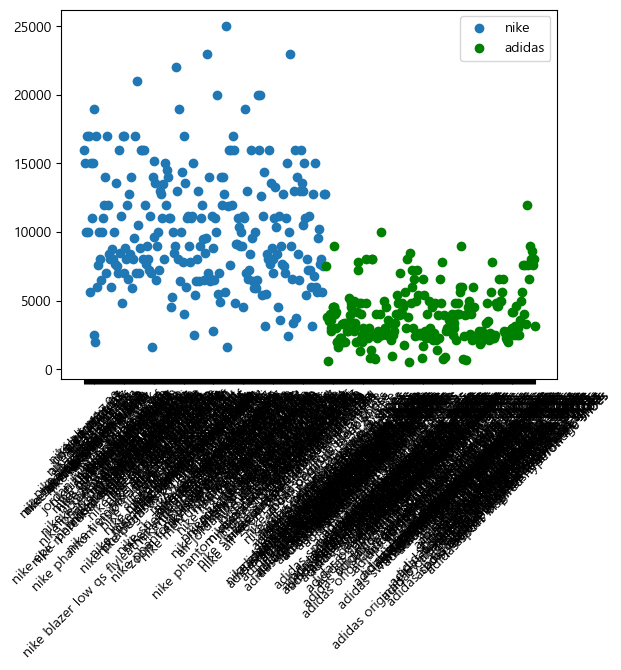

In [92]:
nike_drop_duplicated

plt.scatter(nike_drop_duplicated['Product Name'], nike_drop_duplicated['Sale Price'] ,label='nike')
plt.scatter(adidas_drop_duplicated['Product Name'], adidas_drop_duplicated['Sale Price'], label='adidas', color = 'green')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [93]:
adidas_drop_duplicated

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,adidas originals nmd_racer primeknit shoes,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,adidas originals sleek shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,adidas swim puka slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,adidas sport inspired questar ride shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,adidas originals taekwondo shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
519,originals kiellor shoes,EF5642,7999,7999,0,Adidas ORIGINALS,4.8,7
521,adidas originals sl andridge shoes,EF5547,8599,8599,0,Adidas ORIGINALS,2.9,88
528,originals sleek shoes,EF4935,7599,7599,0,Adidas ORIGINALS,4.4,84
534,originals gazelle shoes,EF6507,7999,7999,0,Adidas ORIGINALS,4.9,3


In [94]:
adidas_noSex['Brand'] = adidas_noSex['Brand'].replace(r'(?i)adidas.*', 'Adidas', regex=True)

## Sales Price
- Range 
    Nike  1595 ~ 24995
    Adidas  499 ~ 11999

In [95]:

nike_drop_duplicated['Sale Price'].describe(),   adidas_drop_duplicated['Sale Price'].describe()

(count      250.000000
 mean     10275.592000
 std       4312.806431
 min       1595.000000
 25%       6997.000000
 50%       9617.000000
 75%      12995.000000
 max      24995.000000
 Name: Sale Price, dtype: float64,
 count      250.000000
 mean      3797.332000
 std       1955.424653
 min        499.000000
 25%       2499.000000
 50%       3329.000000
 75%       4799.000000
 max      11999.000000
 Name: Sale Price, dtype: float64)

In [96]:
import matplotlib.font_manager as fm
import seaborn as sns

font_path = 'C:\\Windows\\Fonts\\malgun.TTF'
font_jae = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_jae)

In [97]:
# 2개 다 -병합
df_concat_jae = pd.concat([nike_drop_duplicated, adidas_drop_duplicated], axis=0,ignore_index = True)
# df_concat_jae.sort_values(by=['Product Name', 'Listing Price'], ascending=(None, False)
df_concat_jae.groupby('Product Name')['Listing Price'].max()


Product Name
adidas americana low shoes              6599
adidas nova run x shoes                 8599
adidas original x_plr shoes             7599
adidas originals a.r. trainers          7999
adidas originals adi-ease shoes         7599
                                        ... 
sport inspired qt racer shoes           4599
sport inspired retrorun shoes           4999
sport inspired yking 2.0 shoes          3299
zoom freak 1                               0
zoom freak 1 'employee of the month'       0
Name: Listing Price, Length: 467, dtype: int64

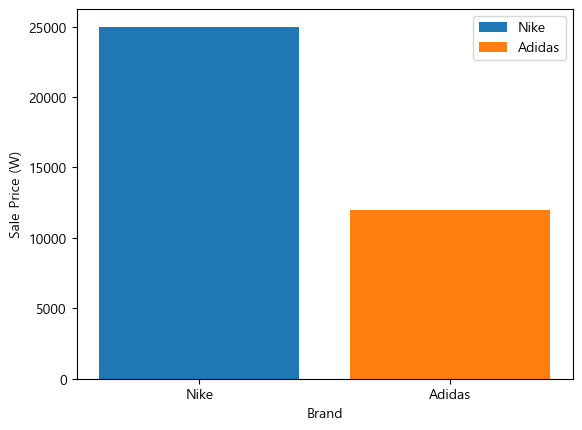

In [98]:
# 나이키와 아디다스 할인 가격 범위 비교
plt.bar(nike_drop_duplicated['Brand'],nike_drop_duplicated['Sale Price'], label = 'Nike')  # 24995원 
plt.bar(adidas_drop_duplicated['Brand'], adidas_drop_duplicated['Sale Price'],label='Adidas')   # 11999원
 
plt.xlabel('Brand')
plt.ylabel('Sale Price (W)')
plt.legend()

plt.show()

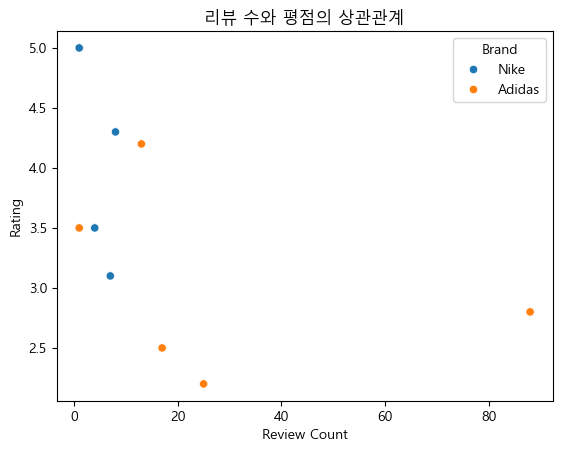

In [103]:
# 리뷰수 와 평점의 상관관계

sns.scatterplot(data= head_concat_jae,
                x= 'Reviews',
                y = 'Rating', 
                hue='Brand')

plt.title('리뷰 수와 평점의 상관관계')
plt.xlabel('Review Count')
plt.ylabel('Rating')

plt.show()

In [100]:
# 리뷰 수가 많은 신발 중 할인 가격
review_filter_jae = df_concat_jae[df_concat_jae['Reviews'] != 0]
# review_filter_jae.groupby(['Brand', 'Product ID'])['Sale Price'].max().sort_values(ascending=False)
# review_filter_jae.groupby('Brand')['Sale Price'].max
nike_sorted_df_jae = review_filter_jae[review_filter_jae['Brand'] == 'Nike'] \
                    .sort_values(['Sale Price', 'Product ID'], ascending=[False, True])
nike_head_jae = nike_sorted_df_jae.head()

adidas_sorted_df_jae = review_filter_jae[review_filter_jae['Brand'] == 'Adidas'] \
                    .sort_values(['Sale Price', 'Product ID'], ascending=[False, True])
adidas_head_jae = adidas_sorted_df_jae.head()
adidas_head_jae

# head 데이터 병합
head_concat_jae = pd.concat([nike_head_jae, adidas_head_jae], axis =0, ignore_index=True)
head_concat_jae


,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,nike mercurial superfly 7 elite mds fg,BQ5469-703,0,24995,0,Nike,5.0,1
1,nike mercurial superfly 7 elite fg,AQ4174-049,0,22995,0,Nike,4.3,8
2,nike phantom vision 2 elite dynamic fit fg,CD4161-606,0,22995,0,Nike,5.0,1
3,nike mercurial vapor 13 elite fg,AQ4176-049,0,21995,0,Nike,3.5,4
4,nike tiempo legend 8 elite fg,AT5293-004,0,20995,0,Nike,3.1,7
5,adidas originals zx torsion shoes,EF4375,11999,11999,0,Adidas,2.5,17
6,adidas originals futurepacer shoes,CM8453,19999,9999,50,Adidas,3.5,1
7,adidas originals by alexander wang wangbody ru...,EF2437,17999,8999,50,Adidas,2.2,25
8,originals eqt gazelle shoes,EF5320,8999,8999,0,Adidas,2.8,88
9,adidas originals supercourt shoes,EG2012,8999,8999,0,Adidas,4.2,13


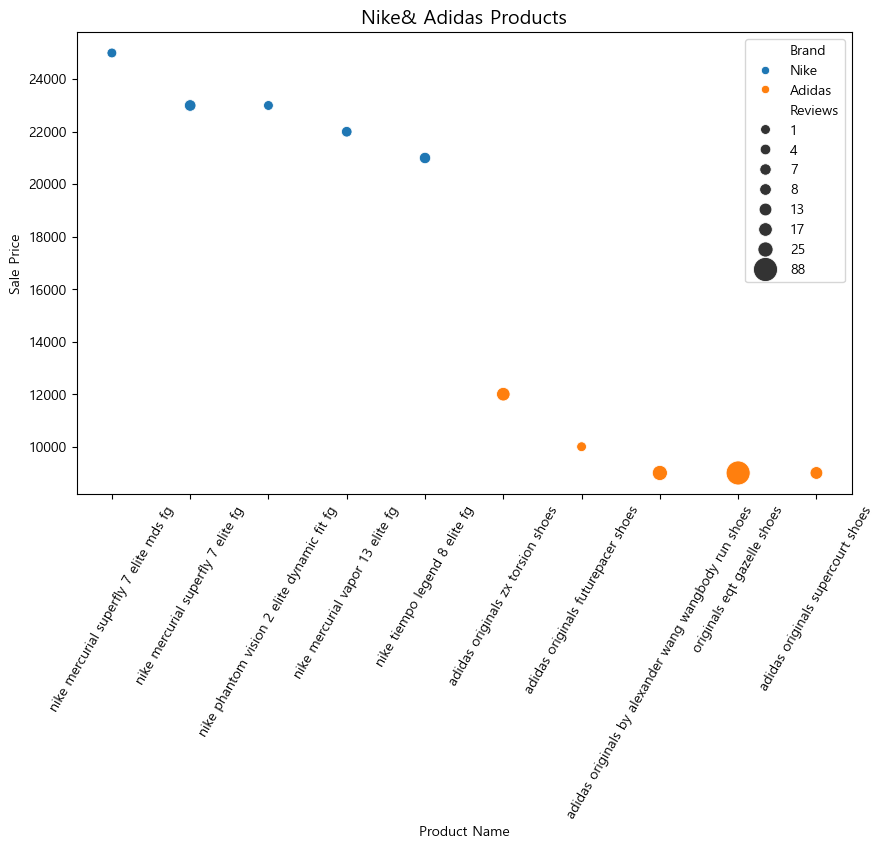

In [101]:
# 그래프 (점의 크기에 따른 리뷰의 수 확인 가능 )

plt.figure(figsize=(10,6))

sns.scatterplot(data= head_concat_jae,
                x='Product Name', 
                y= 'Sale Price',
                hue = 'Brand',
                size='Reviews', 
                sizes=(50,300),
                legend='full')
plt.xticks(rotation=60)

plt.title('Nike& Adidas Products', fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Sale Price')

plt.show()

# plt.scatter(nike_head_jae['Product ID'],nike_head_jae['Sale Price'], color = 'red', label='Nike')
# plt.scatter(adidas_head_jae['Product ID'],adidas_head_jae['Sale Price'], color='green', label='Adidas')

# plt.xticks(rotation=45)
# plt.show()


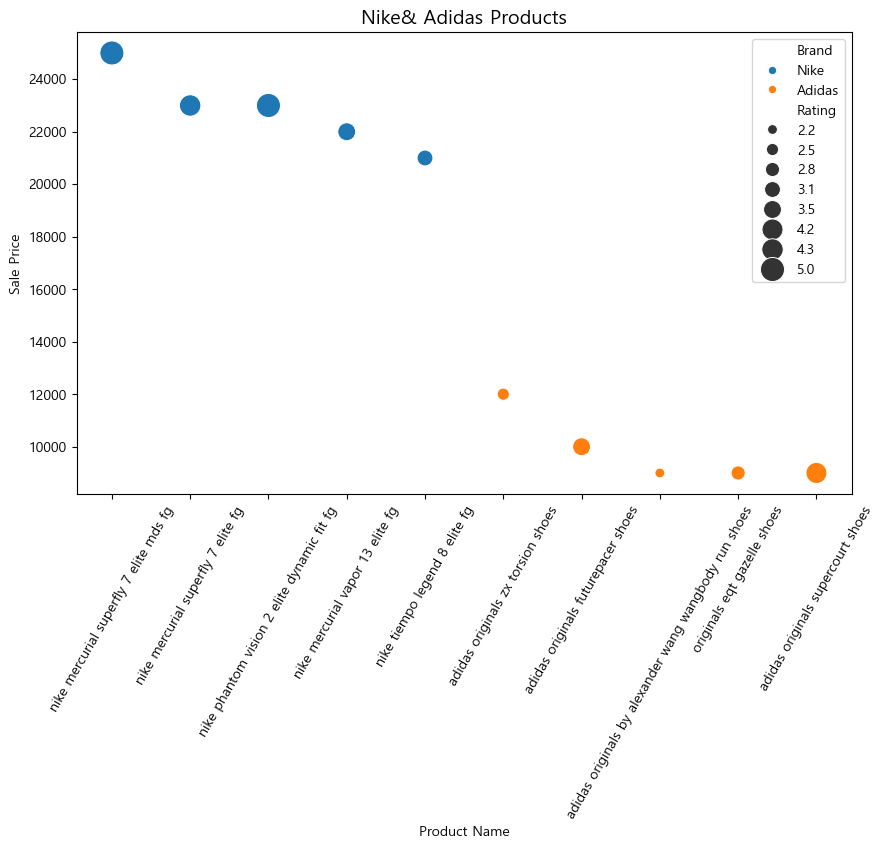

In [102]:
# 할인 가격에 따른 평점 확인
plt.figure(figsize=(10,6))

sns.scatterplot(data= head_concat_jae,
                x='Product Name', 
                y= 'Sale Price',
                hue = 'Brand',
                size='Rating', 
                sizes=(50,300),
                legend='full')
plt.xticks(rotation=60)

plt.title('Nike& Adidas Products', fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Sale Price')

plt.show()

스니커즈 구매자 페르소나

공통 관심사

신발의 편안한 착화감
가성비 높은 할인 제품
트렌디한 디자인
실제 착용 후기
온라인 구매의 편리성
김준호 고객, (리뷰, 후기 확인, 할인 제품) -> 물품 이름, 리뷰 수, 평점, 가격, 할인 가격 등등
이미나 고객, (할인 제품, 재고, 디자인) -> 물품 이름, 가격, 할인 가격, 브랜드 명

먼저 위를 확인할 수 있는 데이터 만들어보기

할인 가격